In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("All_Diets.csv")
df.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44,2022-10-16,17:20:09
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68,2022-10-16,17:20:09
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90,2022-10-16,17:20:09
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80,2022-10-16,17:20:09
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01,2022-10-16,17:20:09


In [27]:
def clean_string(input_string):
    input_string = re.sub(r"([a-zA-Z]+)'s", r'\1s', input_string)
    cleaned_string = re.sub(r'[^a-zA-Z\s]', ' ', input_string)
    words = [word.lower() for word in cleaned_string.split()]
    return " ".join(words)

df["Recipe_name"] = df["Recipe_name"].apply(clean_string)

In [28]:
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,bone broth from nom nom paleo,american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,paleo effect asian glazed pork sides a sweet c...,south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,paleo pumpkin pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,strawberry guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,asian cauliflower fried rice from nom nom paleo,chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,brown butter sunchoke soup with brussels sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,make your own salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,luis bu uel dry martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,cornflake semi fried chicken tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


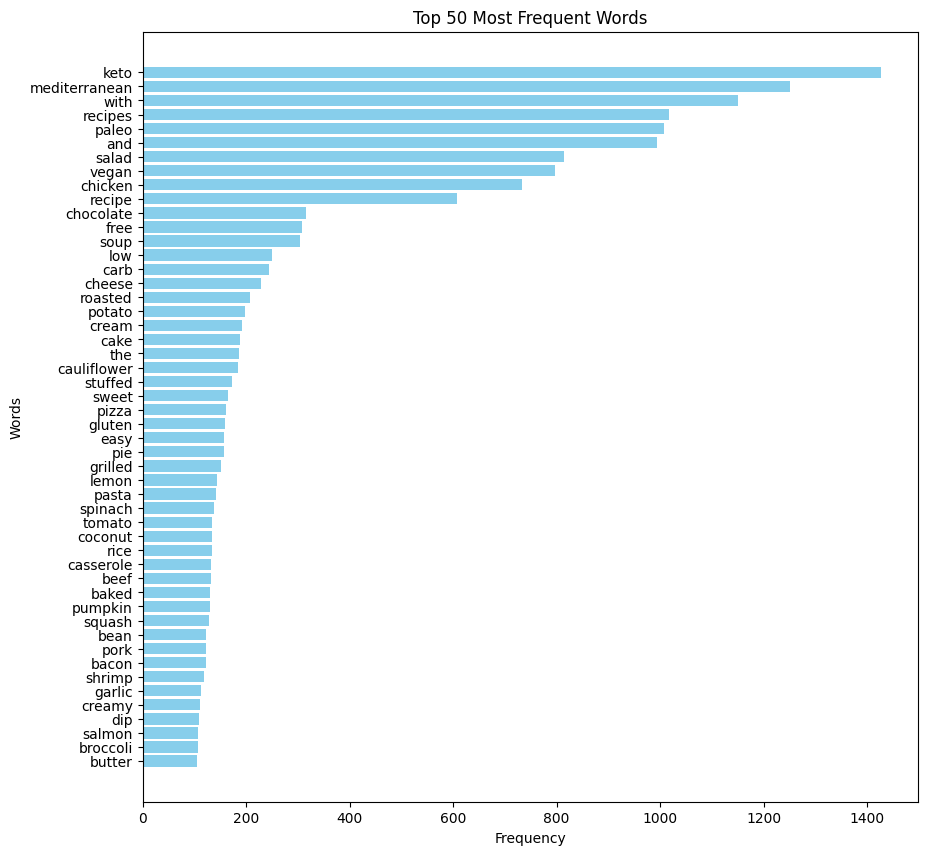

In [29]:
recipes = df["Recipe_name"]
recipes = recipes.to_numpy()
all_words = []
for recipe in recipes:
    all_words.extend(recipe.split())

words, counts = np.unique(all_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words')
plt.gca().invert_yaxis()  
plt.show()

In [30]:
trash_words = set([word for word in "keto,mediterranean,recipes,recipe,easy,with,and,the,a,paleo".split(",")])

def remove_stopwords(input_string):
    words = [word for word in input_string.split() if word not in trash_words]
    return " ".join(words)

df["Recipe_name"] = df["Recipe_name"].apply(remove_stopwords)

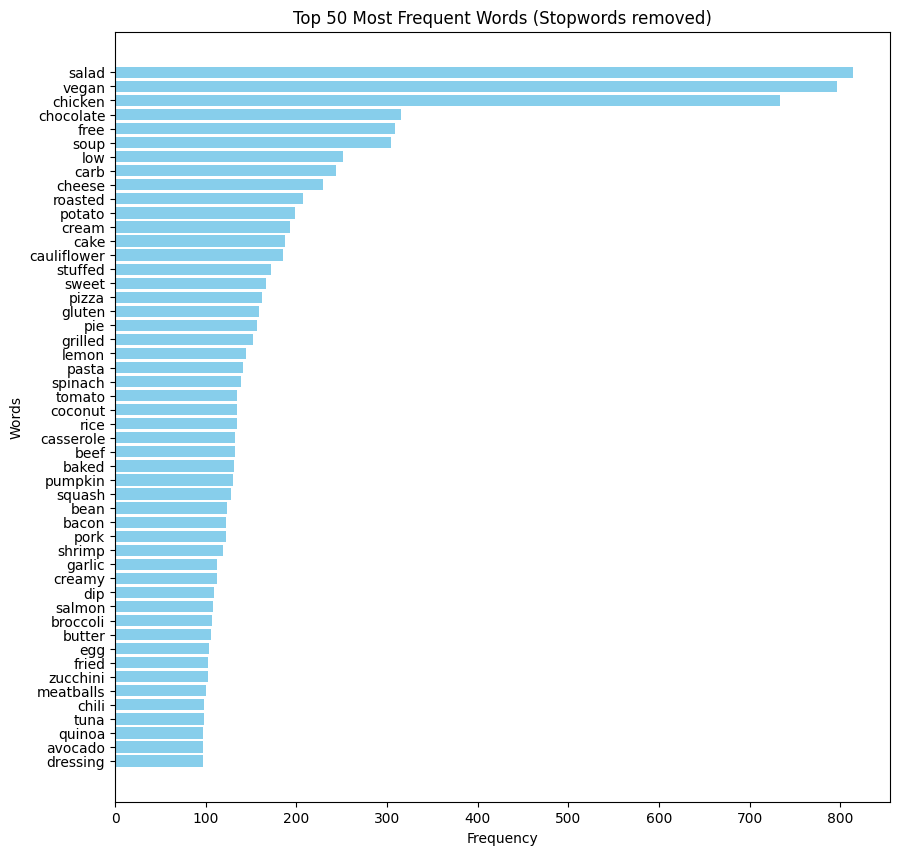

In [31]:
recipes = df["Recipe_name"]
recipes = recipes.to_numpy()
all_words = []
for recipe in recipes:
    all_words.extend(recipe.split())

words, counts = np.unique(all_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words (Stopwords removed)')
plt.gca().invert_yaxis()  
plt.show()

In [33]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,bone broth from nom nom,american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,effect asian glazed pork sides sweet crispy ap...,south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,pumpkin pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,strawberry guacamole,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,asian cauliflower fried rice from nom nom,chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [34]:
df.to_csv("All_Diets_cleaned.csv",index=False)